In [13]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
pwd

'd:\\Universidad\\Cursos\\Fundamentos de Inteligencia Artifical y Machine Learning\\Supervise Learning\\KNN'

In [3]:
cd "D:/Universidad/Cursos/Fundamentos de Inteligencia Artifical y Machine Learning/KNN"

[WinError 2] El sistema no puede encontrar el archivo especificado: 'D:/Universidad/Cursos/Fundamentos de Inteligencia Artifical y Machine Learning/KNN'
d:\Universidad\Cursos\Fundamentos de Inteligencia Artifical y Machine Learning\Supervise Learning\KNN


In [4]:
df = pd.read_csv('diabetes.csv') #Leer el dataset
df.head() #Muestra las 5 primeras filas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Separar columnas
y = df['Outcome'].values #Crea la variable 'Y' donde esta target(con .values convierte en narray)
x = df.drop('Outcome',axis = 1).values #Almacena todas las columnas menos la ultima (axis = 0 es fila y axis=1 es columna)
type(y), type(x)

(numpy.ndarray, numpy.ndarray)

In [6]:
#Obtener datos de entrenamiento y de testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0 ) #test_size(porcentaje para testear), random_state(siempre la separe de la misma manera al llamar la funcion)
print(x_train.shape, y_test.shape) #Imprime el tamaño del array de entrenamiento y testeo para saber cuantos datos dividio

(537, 8) (231,)


In [7]:
knn = KNeighborsClassifier(n_neighbors= 9) #Numero de vecinos

In [8]:
#Fit para entrenar
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [9]:
#Ahora predecir
y_predict = knn.predict(x_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [10]:
#Rectificar el modelo
knn.score(x_test, y_test)

0.7489177489177489

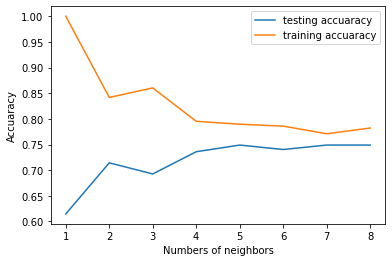

In [11]:
import matplotlib.pyplot as plt

neighbors = np.arange(1,9) #Creacion de array
train_accuaracy = np.empty(len(neighbors))
test_accuaracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    #Accuaracy training
    train_accuaracy[i] = knn.score(x_train, y_train)
    #Accuaracy testing
    test_accuaracy[i] = knn.score(x_test, y_test)
#Plot
plt.plot(neighbors, test_accuaracy, label = 'testing accuaracy')
plt.plot(neighbors, train_accuaracy, label = 'training accuaracy')
plt.legend()
plt.xlabel('Numbers of neighbors')
plt.ylabel('Accuaracy')
plt.show()

In [15]:

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2,10)}
knn_gscv = GridSearchCV(knn2,param_grid,cv=5)
knn_gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [16]:
knn_gscv.best_params_

{'n_neighbors': 7}

In [17]:
knn_gscv.best_score_

0.7373831775700934

In [22]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(x_train,y_train)
y_pred = knn_final.predict(x_test)
print(knn_final.score(x_test,y_test))
print(knn_final.score(x_train,y_train))


0.7489177489177489
0.770949720670391
